In [1]:
import pandas as pd
data=pd.read_csv("waterQuality1.csv")
print(data)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

In [2]:
X=pd.DataFrame(data.drop(["is_safe"], axis=1))
#y=pd.DataFrame(data["is_safe"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_stand = scaler.fit_transform(X)
X_stand[0]

array([ 0.77740287, -0.58549134, -0.48087476,  1.05420463, -0.99324073,
       -0.7119415 ,  2.15299297, -0.97304989, -1.65744641, -0.36334546,
       -0.86938659, -0.78107011,  1.12976694, -0.34862871,  0.60917784,
        1.20336217,  1.66184198,  1.05369443,  1.33873624, -0.91704015])

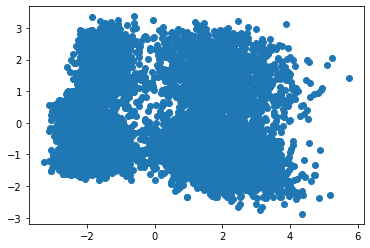

In [4]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 
 
pca = PCA(n_components=2)
X_trans=pca.fit_transform(X_stand)
plt.scatter(X_trans[:,0],X_trans[:,1])
plt.show()

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score

n = len(X)
labels= range(0,n)
scores=[]
for i in np.arange(0.05,1,0.05):
  model = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=i)
  model.fit(X,labels)
  labels = model.apply(X)
  sil=silhouette_score(X_stand,labels)
  scores.append({'param':round(i,2),'score':round(sil,4)})

scores[:5]

[{'param': 0.05, 'score': -0.022},
 {'param': 0.1, 'score': -0.0011},
 {'param': 0.15, 'score': 0.0087},
 {'param': 0.2, 'score': 0.0087},
 {'param': 0.25, 'score': 0.0201}]

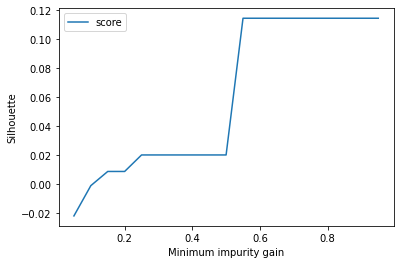

In [6]:
param_list=[x['param'] for x in scores]
score_list=[x['score'] for x in scores]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Silhouette')
ax.set_xlabel('Minimum impurity gain')
plt.plot(param_list,score_list,label='score')
ax.legend()
plt.show()

In [7]:
scores[0]['diff'] = 0 
for i,score in enumerate(scores):
  if i == 0:
    continue
  score['diff']=score['score']-scores[i-1]['score']
scores[:5]

[{'param': 0.05, 'score': -0.022, 'diff': 0},
 {'param': 0.1, 'score': -0.0011, 'diff': 0.0209},
 {'param': 0.15, 'score': 0.0087, 'diff': 0.0098},
 {'param': 0.2, 'score': 0.0087, 'diff': 0.0},
 {'param': 0.25, 'score': 0.0201, 'diff': 0.0114}]

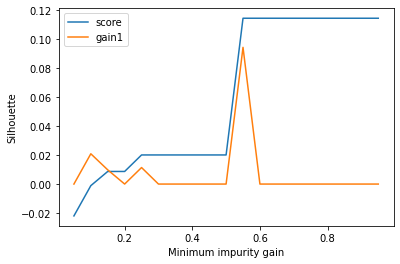

In [8]:
from matplotlib import pyplot as plt 

param_list =[x['param'] for x in scores]
score_list = [x['score'] for x in scores]
diff_list=[x['diff'] for x in scores]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Silhouette')
ax.set_xlabel('Minimum impurity gain')
plt.plot(param_list,score_list,label='score')
plt.plot(param_list,diff_list,label='gain1')
ax.legend()
plt.show()

In [9]:
scores_sorted = sorted(scores, key=lambda x: x['diff'], reverse = True)
threshold = scores_sorted[0]['param']

labels= range(0,n)
model =DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=threshold)
model.fit(X,labels)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.55)

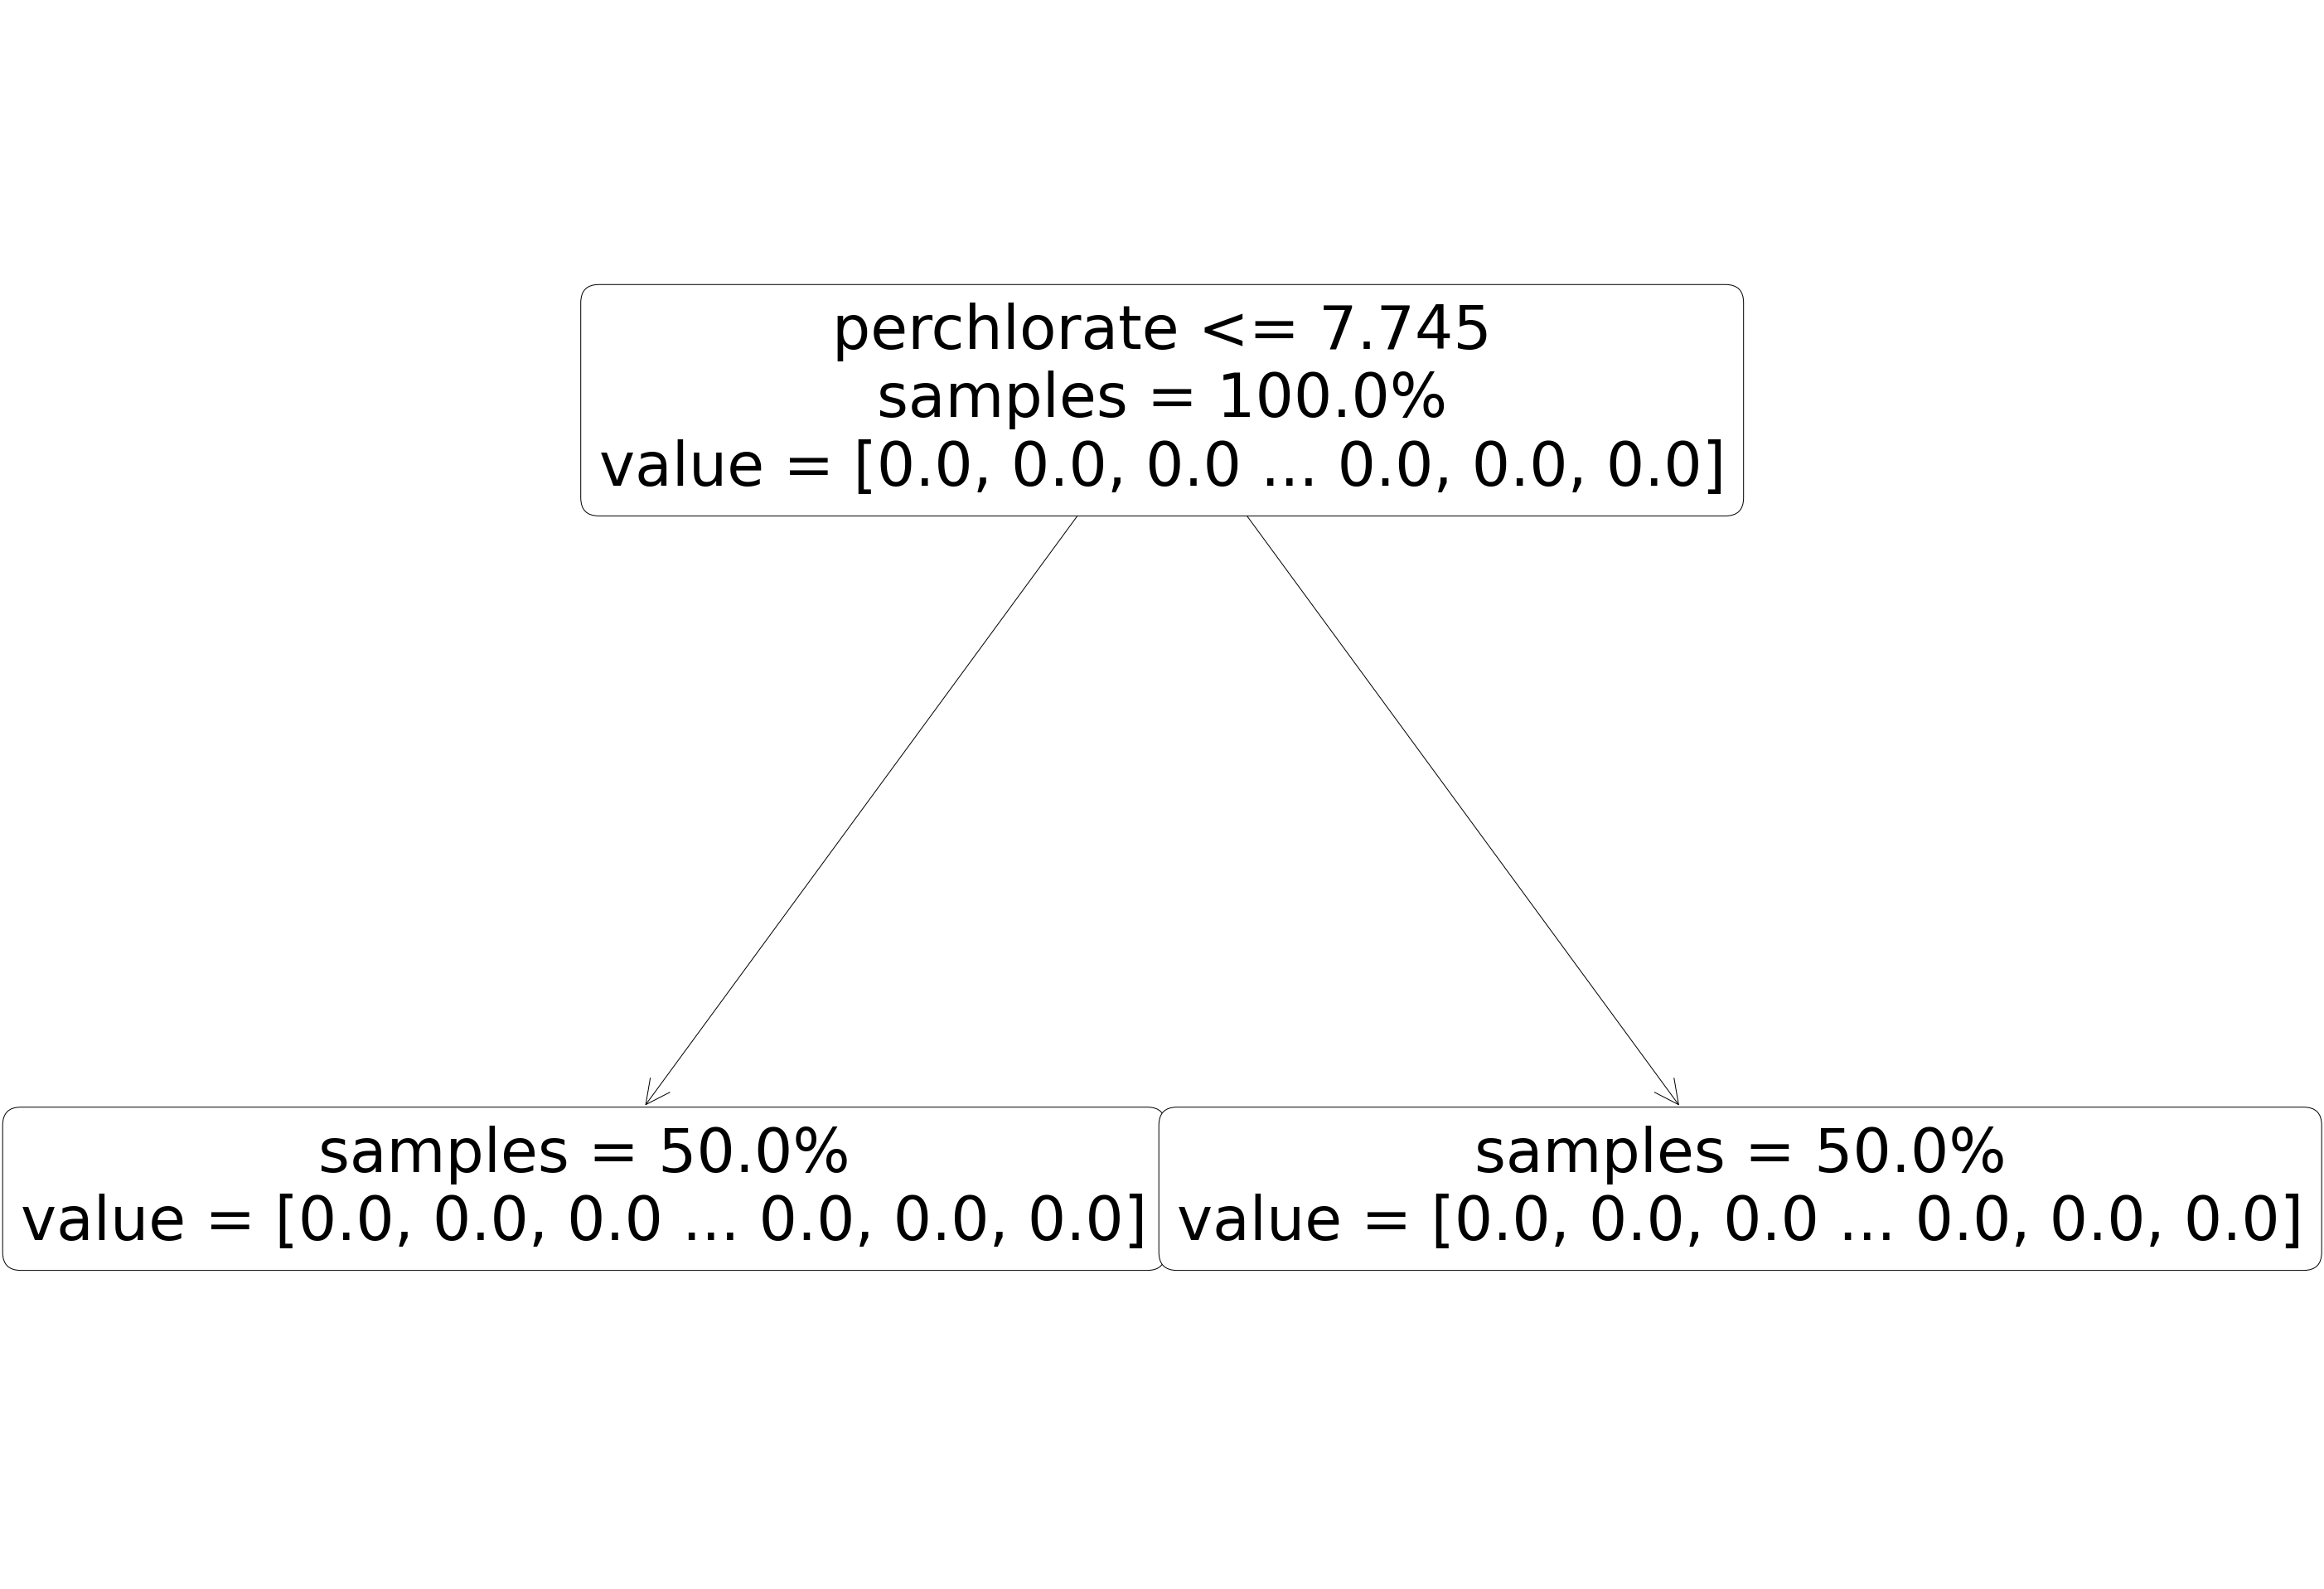

In [10]:
from sklearn import tree
fig =plt.figure(figsize=(50,35))
tree.plot_tree(model,feature_names=X.columns,
               impurity=False,
               proportion=True,rounded=True)
plt.show()

In [11]:
n_nodes = model.tree_.node_count
children_left =model.tree_.children_left
children_right=model.tree_.children_right
features=model.tree_.feature
thresholds=model.tree_.threshold

def make_node(i):
  node={}
  node['parentID']=i
  node['feature']=X.columns[features[i]]
  node['threshold']=round(thresholds[i],2)
  return node

nodes = []
for i in range(0,n_nodes):
  if children_left[i]!=-1:
    node=make_node(i)
    node['ID'] = children_left[i]
    node['comparison']='<='
    nodes.append(node)
  if children_right[i]!=-1:
    node=make_node(i)
    node['ID']=children_right[i]
    node['comparison']='>'
    nodes.append(node)

nodes[:5]


[{'parentID': 0,
  'feature': 'perchlorate',
  'threshold': 7.74,
  'ID': 1,
  'comparison': '<='},
 {'parentID': 0,
  'feature': 'perchlorate',
  'threshold': 7.74,
  'ID': 2,
  'comparison': '>'}]

In [12]:
!pip install owlready2
from owlready2 import *
import types
onto = get_ontology('onto.owl')

with onto:
  for feature in X.columns:
    onto_feature=types.new_class(feature,(DataProperty,))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for owlready2: filename=Owlready2-0.39-cp38-cp38-linux_x86_64.whl size=22260926 sha256=eefaf78c76b88bd72b2d89b350dffcd813c775efe184d020460dda8ed7c05e86
  Stored in directory: /root/.cache/pip/wheels/bd/16/5f/a0bfc34a8f7682cbd6b4d9cb1436c0a0a04ac3579394d7e28a
Successfully built owlready2


In [13]:
with onto:
  for node in nodes:
    parent = node['parentID']
    if parent == 0:
      onto_parent = Thing
    else:
      onto_parent = onto[f'Class_{parent}']
    onto_class = types.new_class(f'Class_{node["ID"]}', (onto_parent,))

    onto_feature = onto[node['feature']]
    threshold = node['threshold']
    if node['comparison'] == '<=':
      onto_class.equivalent_to.append(onto_feature.some(
          ConstrainedDatatype(float, max_inclusive = threshold)))
    else:
      onto_class.equivalent_to.append(onto_feature.some(
          ConstrainedDatatype(float, min_exclusive = threshold)))

onto.save('onto.owl', format='ntriples')   

In [14]:
i = 0

with onto:
  row = X.loc[i]
  inst = Thing(f'inst{i}')
  for feature in X.columns:
    onto_feature = onto[feature]
    onto_feature[inst].append(float(row[feature]))

In [15]:
with onto:
  sync_reasoner_pellet()
  print(inst.is_a)

onto.save('onto_classified.owl',format='ntriples')

* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /usr/local/lib/python3.8/dist-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/jena-core-2.10.0.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/jena-tdb-0.10.0.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/jena-iri-0.9.5.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/httpcore-4.2.2.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/antlr-runtime-3.2.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/aterm-java-1.6.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/xml-apis-1.4.01.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/pellet-2.3.1.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/httpclient-4.2.3.jar:/usr/local/lib/python3.8/dist-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/usr/local/l

[onto.Class_2]


* Owlready2 * Pellet took 4.015157699584961 seconds
* Owlready * Reparenting onto.inst0: {owl.Thing} => {onto.Class_2}
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)
